In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lantern_fiber_utils import LanternFiber

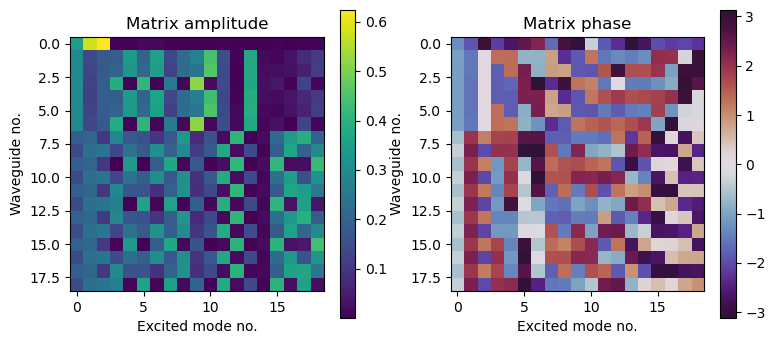

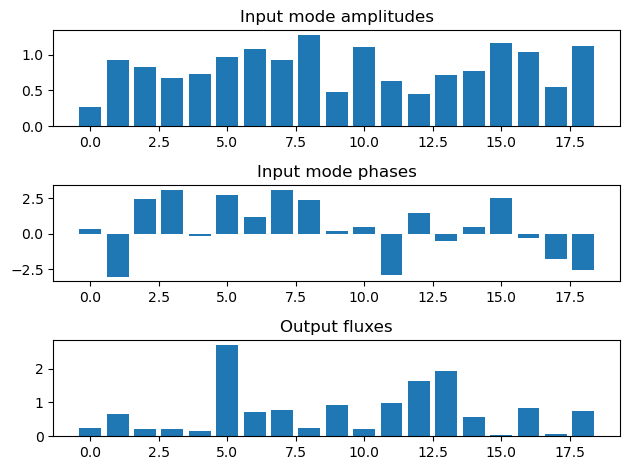

In [3]:
datadir = './'
probedata_filename = 'extractedvals_probeset_19LP__Good202107.npz'

f = LanternFiber(datadir=datadir, nmodes=19, nwgs=19)
f.load_savedvalues(probedata_filename)
f.make_transfer_matrix_mm2sm(show_plots=True)

transfer_matrix = f.Cmat # This is the complex transfer matrix

# These are the coefficients of the LP modes at the input. Here, just pick some random ones.
input_modecoeffs = np.random.uniform(-1, 1, f.nmodes) + 1j*np.random.uniform(-1, 1, f.nmodes)

# Now get the complex amplitudes of the PL outputs:
pl_outputs = transfer_matrix @ input_modecoeffs

# In real life, we just measure the intensities of the outputs:
pl_output_fluxes = np.abs(pl_outputs)**2



# Plot input mode coefficients and output fluxes
xlabels = np.arange(f.nmodes)
plt.figure(1)
plt.clf()
plt.subplot(311)
plt.bar(xlabels, np.abs(input_modecoeffs))
plt.title('Input mode amplitudes')
plt.subplot(312)
plt.bar(xlabels, np.angle(input_modecoeffs))
plt.title('Input mode phases')
plt.subplot(313)
plt.bar(xlabels, pl_output_fluxes)
plt.title('Output fluxes')
plt.tight_layout()